<a href="https://colab.research.google.com/gist/CharlieADavies/d77890895f607ce9a9c447e0db5eb14c/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn plotly openpyxl

You should consider upgrading via the 'C:\Users\cd\gitrepos\datawebsite\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import plotly.io as pio
pio.renderers.default_rdenderer = 'jupyterlab'

In [4]:
import pandas as pd
# df = pd.read_excel("../data/nsf21308-tab048.xlsx", header=4)
import seaborn as sns

df = pd.read_excel('https://ncses.nsf.gov/pubs/nsf21308/assets/data-tables/tables/nsf21308-tab048.xlsx',header=4)

df = df.rename(columns={
    'Unnamed: 0' : 'Field',
    'Male' : 'TotalMale',
    'Female' : 'TotalFemale',
    'Total' : 'EmploymentTotal',
    'Male.1':'EmploymentMale',
    'Female.1':'EmploymentFemale',
    'Total.1':'PostdoctoralStudyTotal',
    'Male.2': 'PostdoctoralStudyMale',
    'Female.2': 'PostdoctoralStudyFemale'})

C:\Users\cd\gitrepos\datawebsite\venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [12]:
df.head()

,Field,TotalMale,TotalFemale,EmploymentTotal,EmploymentMale,EmploymentFemale,PostdoctoralStudyTotal,PostdoctoralStudyMale,PostdoctoralStudyFemale
0,All fields,70000.0,60000.0,83000.0,95000.0,72500.0,50000.0,50000.0,50000.0
1,Science and engineering,70000.0,59530.0,92000.0,100000.0,80000.0,50000.0,50000.0,50000.0
2,Life sciences,52000.0,52500.0,82000.0,87000.0,80000.0,50000.0,50000.0,50000.0
3,Agricultural sciences and natural resources,55000.0,55000.0,75000.0,80000.0,70116.0,49000.0,48216.0,49000.0
4,Biological and biomedical sciences,50004.0,50000.0,85000.0,90000.0,80000.0,50000.0,50000.0,50000.0


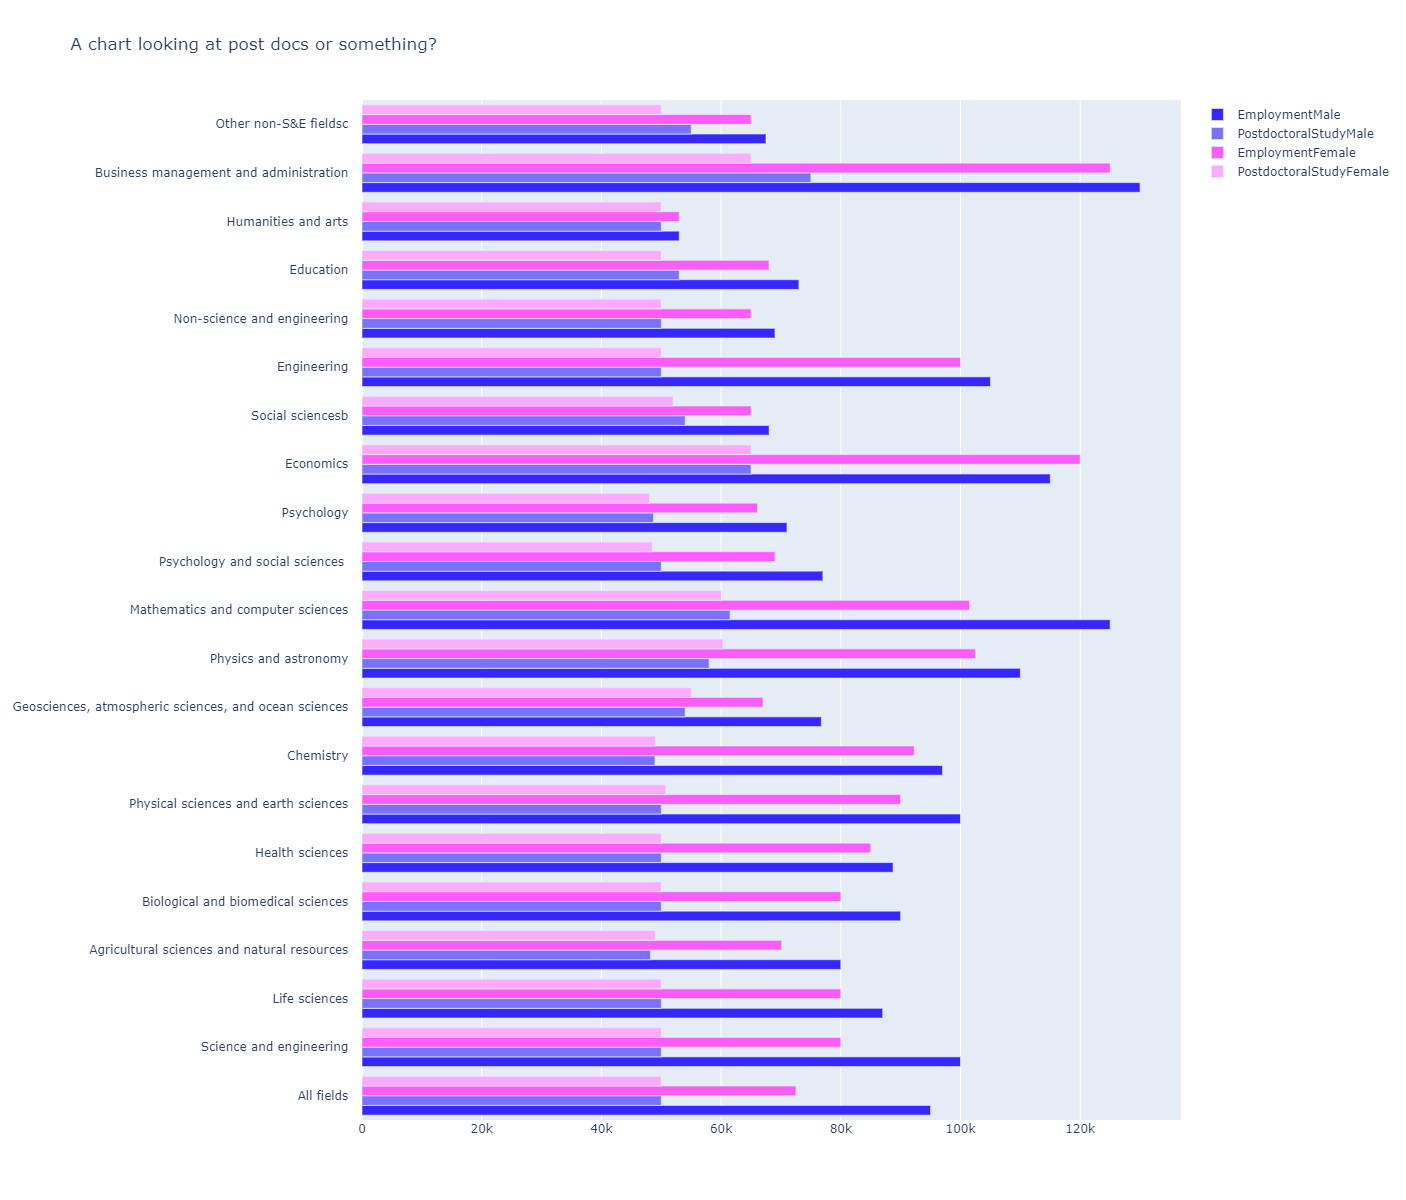

In [125]:
import plotly.graph_objects as go
fig = go.Figure()

colours = dict(zip(['EmploymentMale','PostdoctoralStudyMale', 'EmploymentFemale',  'PostdoctoralStudyFemale'], ["#3627fd","#7973fc","#fb5dfd","#fcacfe"]))

for employment_type in ['EmploymentMale','PostdoctoralStudyMale', 'EmploymentFemale',  'PostdoctoralStudyFemale']:
    fig.add_trace(go.Bar(y=df['Field'], x=df[employment_type], orientation="h", name=employment_type, marker_color=colours[employment_type]),)

fig.update_layout(height=1200, title="A chart looking at post docs or something?")

fig.update_yaxes(showticksuffix="all", ticksuffix="   ",)

fig.write_html("chart_1_out.html")
fig

# sns.barplot(data=df, y=df['Field'], x=df['EmploymentTotal'], orient='h', order = df.sort_values('EmploymentTotal').Field)

'#' is not recognized as an internal or external command,
operable program or batch file.


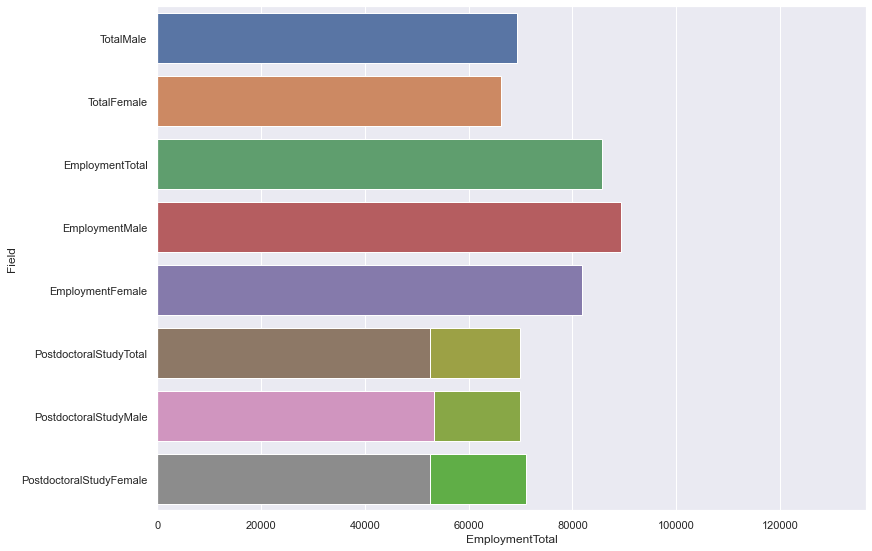

In [9]:
sns.set(rc={'figure.figsize':(12.7,9.27)})
graph = sns.barplot(data=df, ci=None, orient="h")

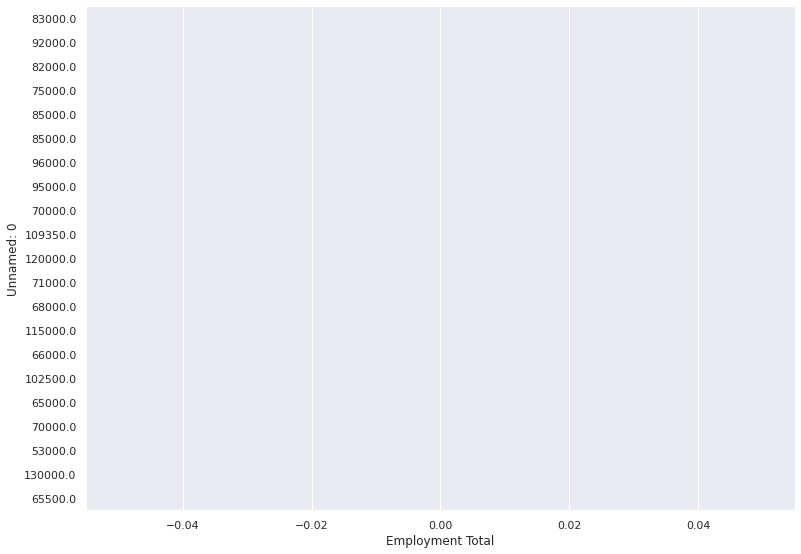

In [ ]:
sns.barplot(data=df, y=df["Unnamed: 0" ], x=df["Employment Total"], orient="h", order=df['Employment Total']) #order=df.sort_values('Employment Total'))


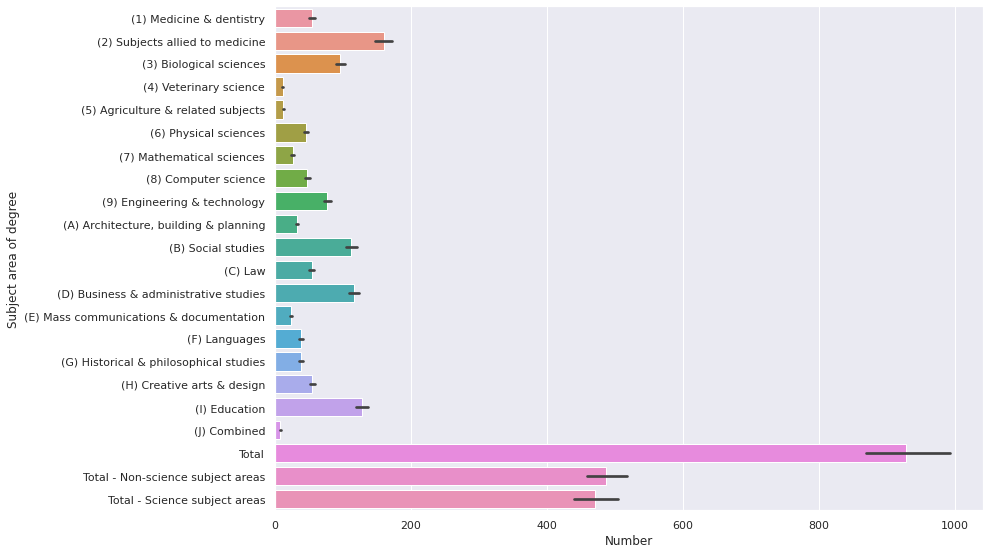

In [ ]:
from numpy import number

df2 = pd.read_csv('Table-25-2018-19.csv', header=14)

sns.barplot(data=df2, y=df2['Subject area of degree'], x=df2['Number'], orient='h')

In [ ]:
df2.head()

,Subject area of degree,Country of provider,Provider type,Level of qualification obtained,Mode of former study,Skill group,Work population marker,Salary band,Academic year,Number,Percent
0,(1) Medicine & dentistry,All,All,All,All,All,Paid employment is an activity,"Less than £15,000",2017/18,5,0%
1,(1) Medicine & dentistry,All,All,All postgraduate,All,All,Paid employment is an activity,"Less than £15,000",2017/18,0,0%
2,(1) Medicine & dentistry,All,All,All undergraduate,All,All,Paid employment is an activity,"Less than £15,000",2017/18,0,0%
3,(1) Medicine & dentistry,All,All,First degree,All,All,Paid employment is an activity,"Less than £15,000",2017/18,0,0%
4,(1) Medicine & dentistry,All,All,Other undergraduate,All,All,Paid employment is an activity,"Less than £15,000",2017/18,0,0%


In [ ]:
df2['Salary band'].unique()

array(['Less than £15,000', 'Total', '£15,000 - £17,999',
       '£18,000 - £20,999', '£21,000 - £23,999', '£24,000 - £26,999',
       '£27,000 - £29,999', '£30,000 - £32,999', '£33,000 - £35,999',
       '£36,000 - £38,999', '£39,000 - £41,999', '£42,000 - £44,999',
       '£45,000 - £47,999', '£48,000 - £50,999', '£51,000+'], dtype=object)

In [ ]:
#df2[df2['Salary band'] == "Less than £15,000"].loc['Salary band'] = 15000
df2.loc[df2['Salary band'] == 'Less than £15,000','Salary band'] = 15000
df2.loc[df2['Salary band'] == '','Salary band'] = 15000
df2.head()

,Subject area of degree,Country of provider,Provider type,Level of qualification obtained,Mode of former study,Skill group,Work population marker,Salary band,Academic year,Number,Percent
0,(1) Medicine & dentistry,All,All,All,All,All,Paid employment is an activity,15000,2018/19,5,0%
1,(1) Medicine & dentistry,All,All,All postgraduate,All,All,Paid employment is an activity,15000,2018/19,5,0%
2,(1) Medicine & dentistry,All,All,All undergraduate,All,All,Paid employment is an activity,15000,2018/19,5,0%
3,(1) Medicine & dentistry,All,All,First degree,All,All,Paid employment is an activity,15000,2018/19,0,0%
4,(1) Medicine & dentistry,All,All,Other undergraduate,All,All,Paid employment is an activity,15000,2018/19,0,7%


In [ ]:
d = {
'Less than £15,000' : 15_000, 
'Total' : -1, 
'£15,000 - £17,999' : 16_500,
'£18,000 - £20,999' : 19_500,
 '£21,000 - £23,999' : 22_500,
 '£24,000 - £26,999' : 25_500,
'£27,000 - £29,999' : 28_500,
 '£30,000 - £32,999' : 31_500,
 '£33,000 - £35,999' : 34_500,
'£36,000 - £38,999' : 37_500,
 '£39,000 - £41,999' : 40_500, 
'£42,000 - £44,999' : 43_500,
'£45,000 - £47,999' : 46_500, 
'£48,000 - £50,999' : 49_500,
 '£51,000+' : 51_000
}
for k, v in d.items():
    df2.loc[df2['Salary band'] == k,'Salary band'] = v

In [ ]:
df2.head()

,Subject area of degree,Country of provider,Provider type,Level of qualification obtained,Mode of former study,Skill group,Work population marker,Salary band,Academic year,Number,Percent
0,(1) Medicine & dentistry,All,All,All,All,All,Paid employment is an activity,15000,2018/19,5,0%
1,(1) Medicine & dentistry,All,All,All postgraduate,All,All,Paid employment is an activity,15000,2018/19,5,0%
2,(1) Medicine & dentistry,All,All,All undergraduate,All,All,Paid employment is an activity,15000,2018/19,5,0%
3,(1) Medicine & dentistry,All,All,First degree,All,All,Paid employment is an activity,15000,2018/19,0,0%
4,(1) Medicine & dentistry,All,All,Other undergraduate,All,All,Paid employment is an activity,15000,2018/19,0,7%


In [ ]:
gb = df2.groupby(by=['Subject area of degree', 'Salary band',])['Number'].sum().reset_index()
gb = gb[gb['Salary band']!= -1]
gb.head()

,Subject area of degree,Salary band,Number
1,(1) Medicine & dentistry,15000,260
2,(1) Medicine & dentistry,16500,1480
3,(1) Medicine & dentistry,19500,5650
4,(1) Medicine & dentistry,22500,8550
5,(1) Medicine & dentistry,25500,19240


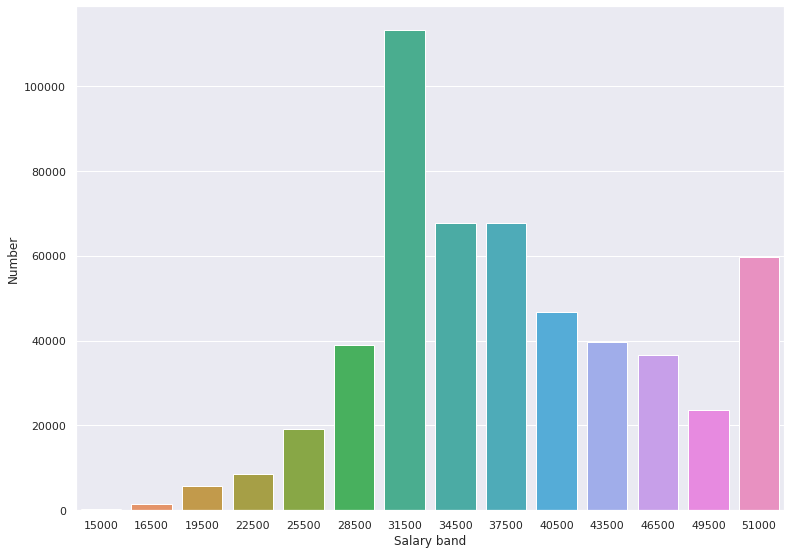

In [ ]:
sns.barplot(data=gb[gb['Subject area of degree'] == '(1) Medicine & dentistry'], x="Salary band", y="Number")

In [ ]:
df2['Subject area of degree'].unique()

array(['(1) Medicine & dentistry', '(2) Subjects allied to medicine',
       '(3) Biological sciences', '(4) Veterinary science',
       '(5) Agriculture & related subjects', '(6) Physical sciences',
       '(7) Mathematical sciences', '(8) Computer science',
       '(9) Engineering & technology',
       '(A) Architecture, building & planning', '(B) Social studies',
       '(C) Law', '(D) Business & administrative studies',
       '(E) Mass communications & documentation', '(F) Languages',
       '(G) Historical & philosophical studies',
       '(H) Creative arts & design', '(I) Education', '(J) Combined',
       'Total', 'Total - Non-science subject areas',
       'Total - Science subject areas'], dtype=object)

[(0.0, 1800000.0), Text(0.5, 1.0, 'Non-science')]

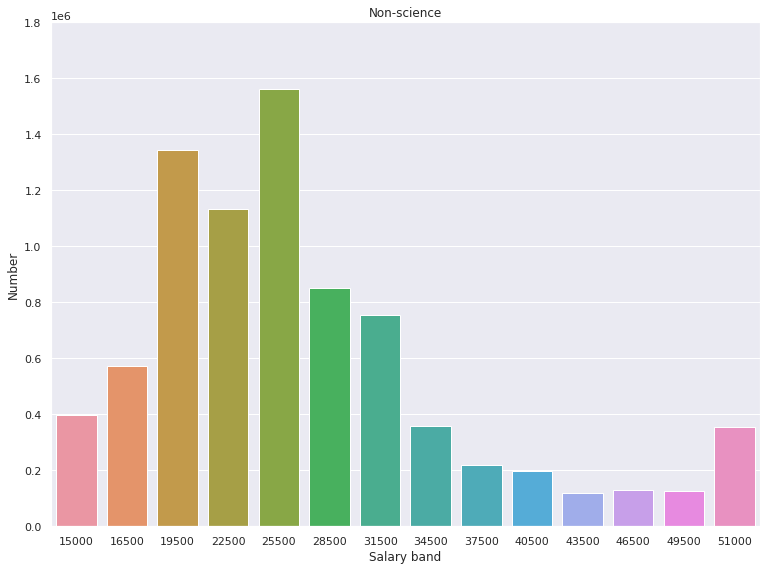

In [ ]:
sns.barplot(data=gb[gb['Subject area of degree'] == 'Total - Non-science subject areas'], x="Salary band", y="Number").set(ylim=(0,1.8e6), title='Non-science')

[(0.0, 1800000.0), Text(0.5, 1.0, 'Science!')]

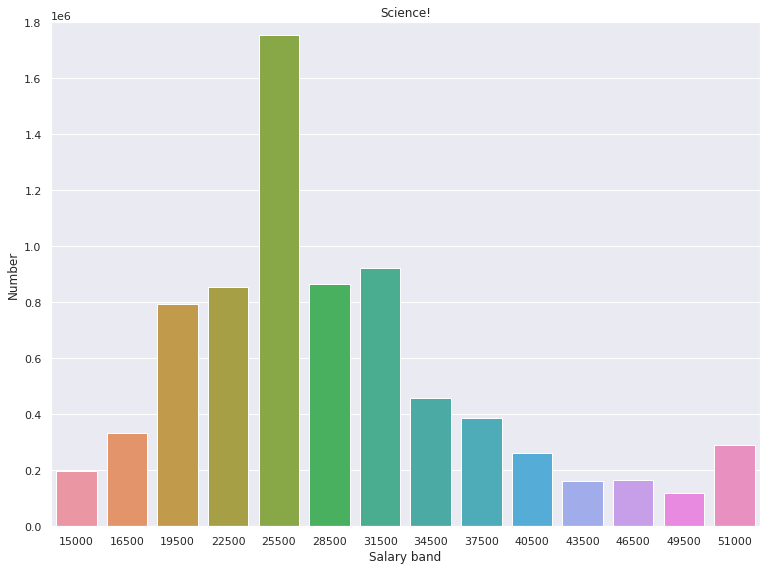

In [ ]:
sns.barplot(data=gb[gb['Subject area of degree'] == 'Total - Science subject areas'], x="Salary band", y="Number", ).set(ylim=(0,1.8e6), title='Science!')

In [ ]:
sns.barplot(data=gb[gb['Subject area of degree'] == 'Total - Science subject areas'], x="Salary band", y="Number", ).set(ylim=(0,1.8e6), title='Science!')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

regex = re.compile(
    r'\$?(?:(?:[1-9][0-9]{0,2})(?:,[0-9]{3})+|[1-9][0-9]*|0)(?:[\.,][0-9][0-9]?)?(?![0-9]+)'
)

df2 = pd.read_csv('Table-25-2018-19.csv',header=14)

array = df2['Salary band'].unique()
print(array)
dict1 = {}
for item in array:
    dict1[item] = regex.findall(item)
    if not dict1[item] == []:
        dict1[item] = dict1[item][len(dict1[item])-1]
        dict1[item] = dict1[item].replace(',','')
        dict1[item] = int(dict1[item])

for key in dict1.keys():
    if not dict1[key] == []:
        df2.loc[df2['Salary band'] == key,'Salary band'] = dict1[key]